#### Alínea b) All-Pass Filters 
Os All-pass filters introduzem tipicamente atrasos entre os 1.7 e 5 ms.


[AP (g, Da) = ( -g + z^(-Da) ) / ( 1 - g*z^(-Da) )]

Da = atraso em nº de amostras

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as ss
import scipy.io.wavfile as wav
from IPython.display import Audio
pi = np.pi

--- Análise do Feadback Comb-Filter (FBCF) ---
Atraso $DC$ (amostras): 1543
Taxa de Amostragem $f_s$: 44100 Hz
--------------------------------------------------

> Analisando Ganho alpha = 0.95


c:\Users\dmdcc\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_filter_design.py:1125: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  b, a = normalize(b, a)
Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


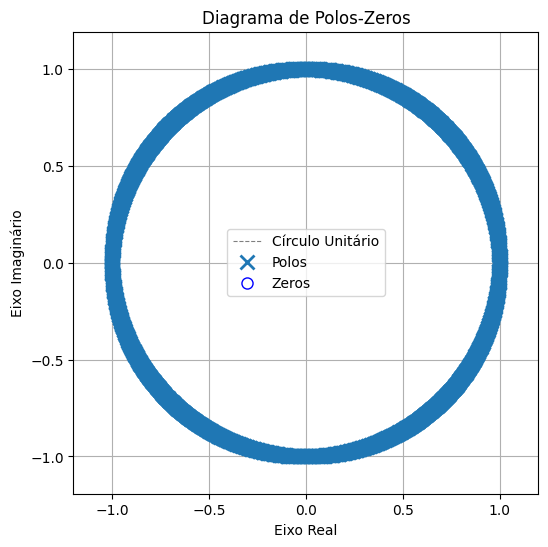

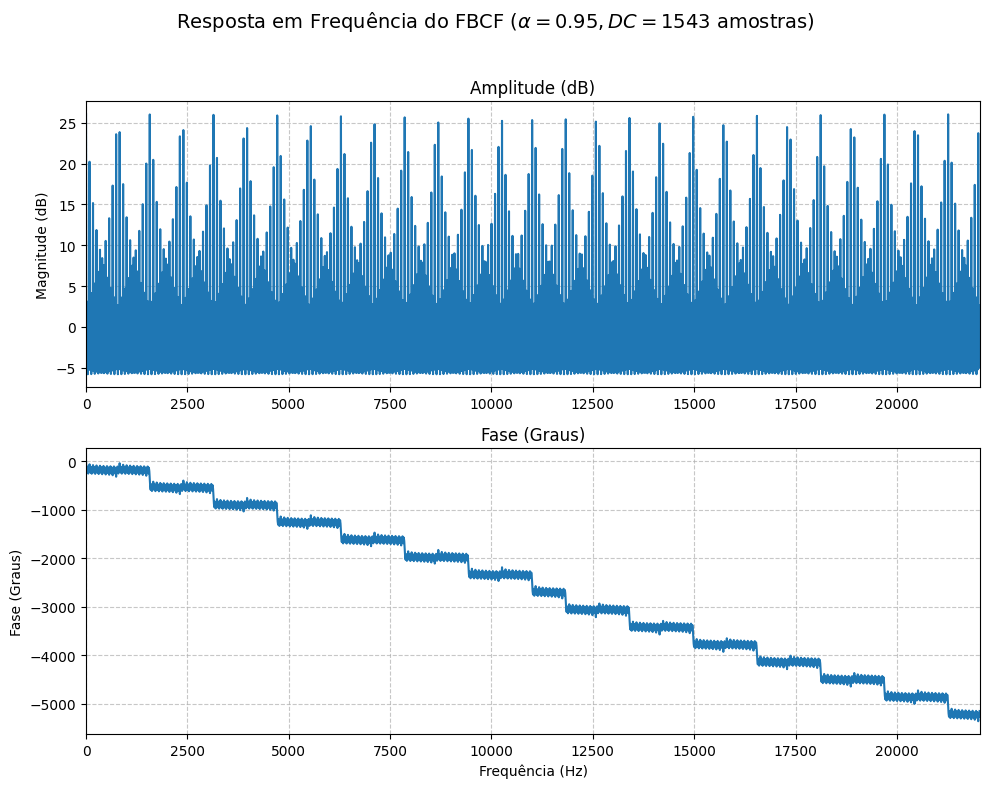


> Analisando Ganho alpha = 0.5


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


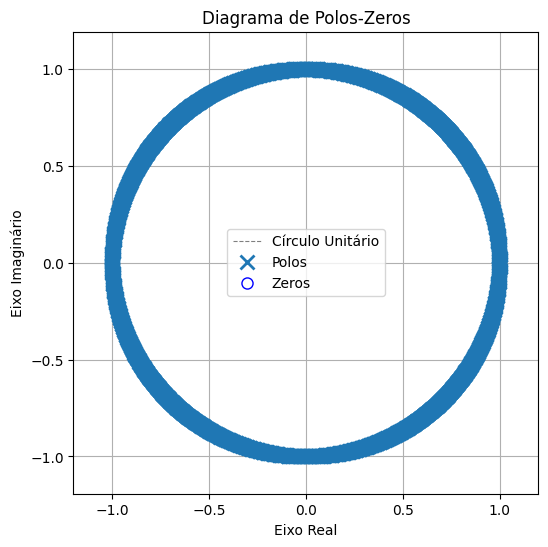

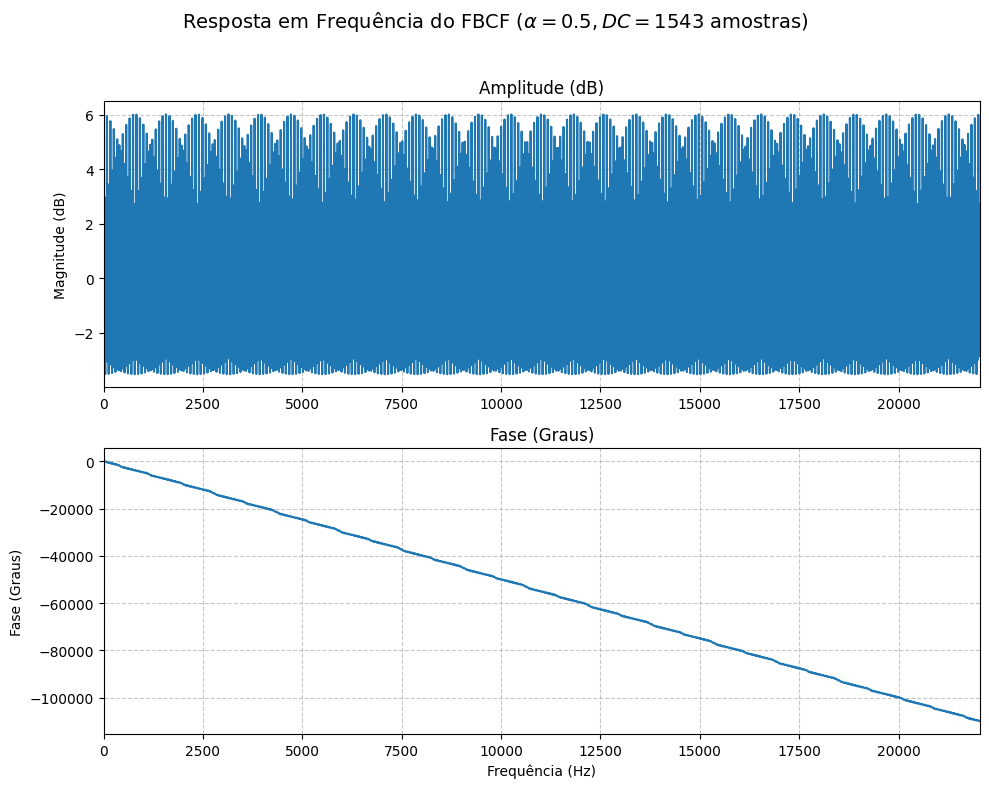


> Analisando Ganho alpha = 0.1


Ignoring fixed y limits to fulfill fixed data aspect with adjustable data limits.


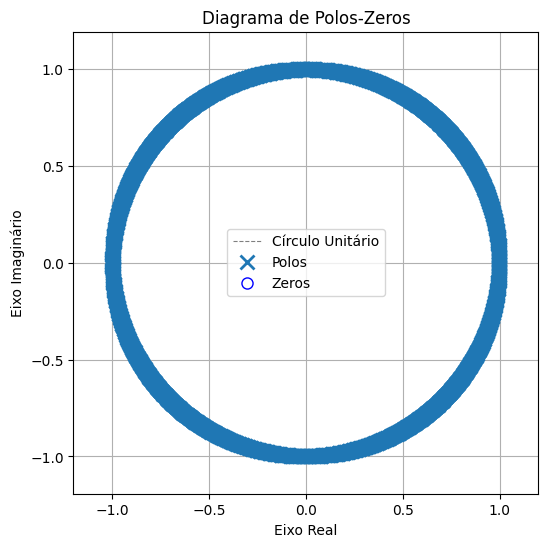

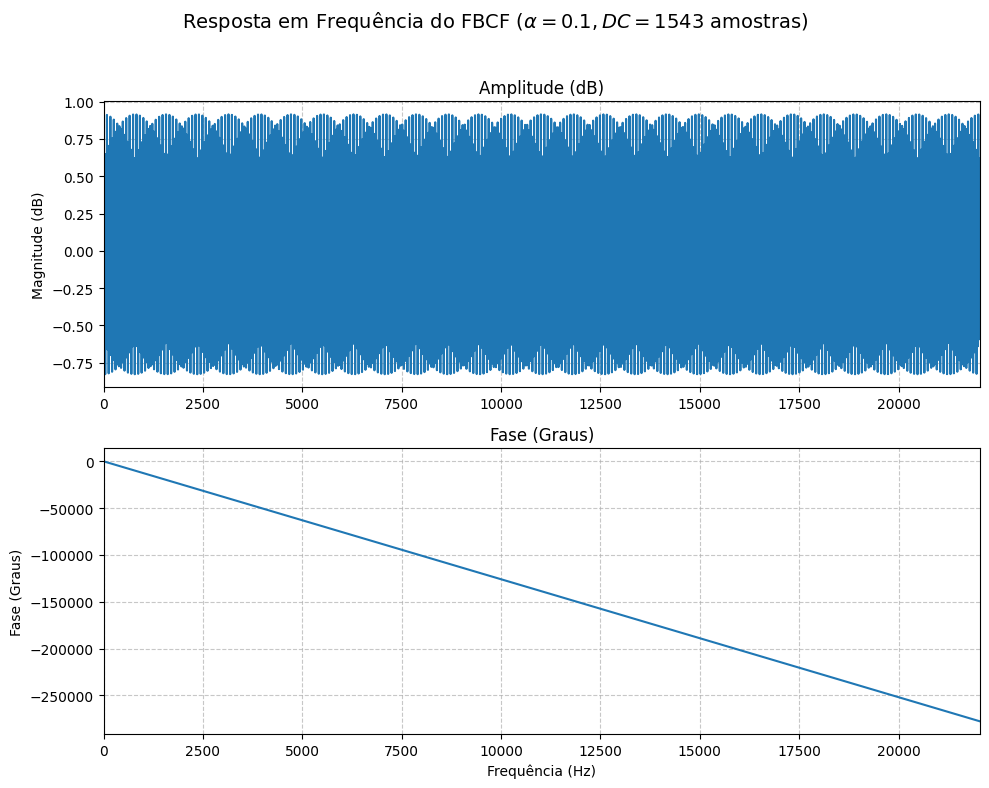

In [3]:
f_s = 44100  
tau_ms = 35  # Atraso típico entre 30 e 45 ms
DC = int(f_s * (tau_ms / 1000)) # Atraso em amostras


# O FBCF é estável apenas se 0 < a < 1
ganhos_a = [0.95, 0.5, 0.1]


def plot_pz_map(zeros, polos, a):
    plt.figure(figsize=(6, 6))

    # Desenhar o Círculo Unitário
    ang = np.linspace(0, 2*np.pi, 100)
    plt.plot(np.cos(ang), np.sin(ang), 'k--', alpha=0.5, linewidth=0.8, label='Círculo Unitário')

    # Polos e Zeros 
    plt.plot(np.real(polos), np.imag(polos), 'x', markersize=10, markeredgewidth=2, label='Polos')
    plt.plot(np.real(zeros), np.imag(zeros), 'o', markersize=8, markeredgecolor='b', markerfacecolor='w', label='Zeros')


    plt.title('Diagrama de Polos-Zeros')
    plt.xlabel('Eixo Real')
    plt.ylabel('Eixo Imaginário')
    plt.grid(True)
    plt.axis('equal')
    plt.xlim([-1.2, 1.2])
    plt.ylim([-1.2, 1.2])
    plt.legend()
    plt.show()

def plot_freq_response(w, H, a, f_s):
    # Frequência em Hz
    f = w * f_s / (2 * np.pi) 

    # Amplitude (Magnitude em dB)
    mag_db = 20 * np.log10(np.abs(H))
    
    # Fase em graus
    fase_graus = np.degrees(np.unwrap(np.angle(H)))

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))
    fig.suptitle(f'Resposta em Frequência do FBCF ($\\alpha = {a}, DC = {DC}$ amostras)', fontsize=14)

    # Gráfico de Amplitude (dB)
    ax1.plot(f, mag_db)
    ax1.set_title('Amplitude (dB)')
    ax1.set_ylabel('Magnitude (dB)')
    ax1.set_xlim([0, f_s / 2])
    ax1.grid(which='both', linestyle='--', alpha=0.7)

    # Gráfico de Fase (Graus)
    ax2.plot(f, fase_graus)
    ax2.set_title('Fase (Graus)')
    ax2.set_xlabel('Frequência (Hz)')
    ax2.set_ylabel('Fase (Graus)')
    ax2.set_xlim([0, f_s / 2])
    ax2.grid(which='both', linestyle='--', alpha=0.7)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta layout para o título
    plt.show()

# --- LOOP DE ANÁLISE PARA CADA GANHO ---

print(f"--- Análise do Feadback Comb-Filter (FBCF) ---")
print(f"Atraso $DC$ (amostras): {DC}")
print(f"Taxa de Amostragem $f_s$: {f_s} Hz")
print("-" * 50)


for a in ganhos_a:
    
    print(f"\n> Analisando Ganho alpha = {a}")

    B = np.zeros(DC + 1)
    B[DC] = 1 

    A = np.zeros(DC + 1)
    A[0] = 1        
    A[DC] = -a  

    
    zeros, polos, ganho = ss.tf2zpk(B, A)

    plot_pz_map(zeros, polos, a)

    N_pontos = 2048
    w, H = ss.freqz(B, A, worN=N_pontos)

    plot_freq_response(w, H, a, f_s)

i) Determine e mostre a resposta em frequência (amplitude e fase). Apresente o Diagrama-Polos-Zeros. 
   
   Nota: Resolva para conjunto de ganhos separadamente.

Coeficientes bk: [-0.5  0.   0.   0.   0.   1. ]
Coeficientes ak: [ 1.   0.   0.   0.   0.  -0.5]


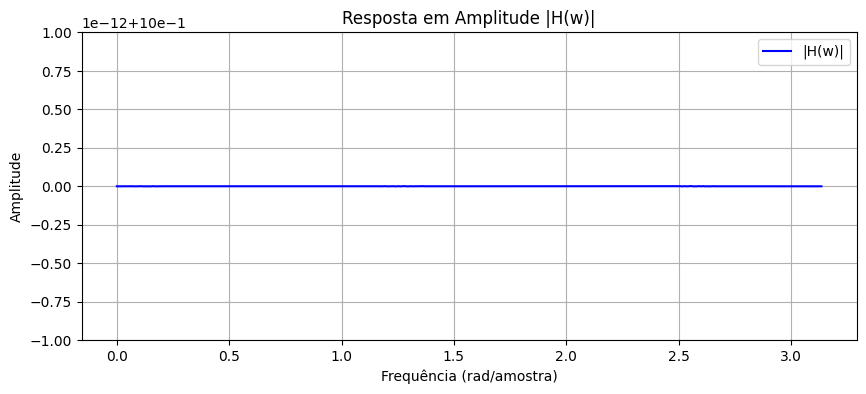

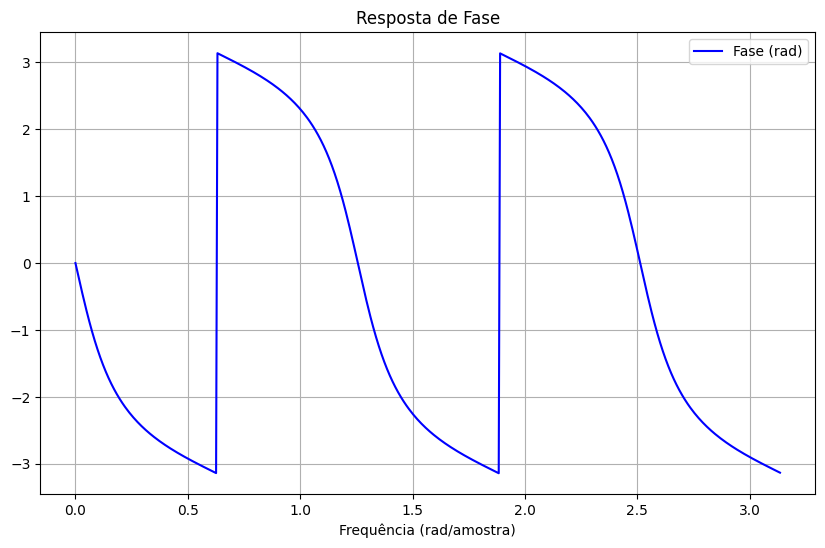

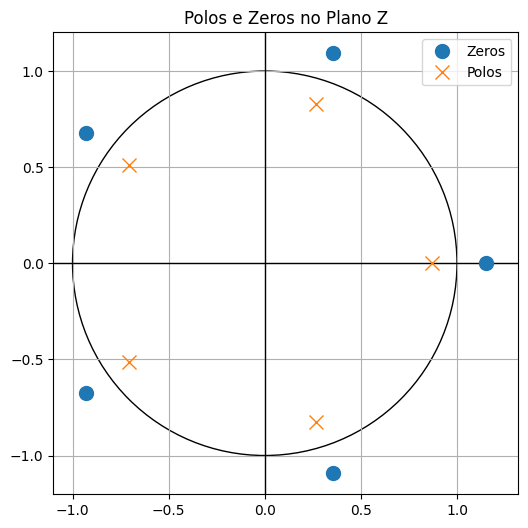

In [ ]:
g = 0.5
Da = 5

bk_AP = np.zeros(Da + 1)
ak_AP = np.zeros(Da + 1)

bk_AP[0] = -g
bk_AP[-1] = 1
ak_AP[0] = 1
ak_AP[-1] = -g

print("Coeficientes bk:", bk_AP)
print("Coeficientes ak:", ak_AP)

w, h = ss.freqz(bk_AP, ak_AP)                                # Resposta em Frequência

plt.figure(figsize=(10, 4))
plt.title('Resposta em Amplitude |H(w)|')
plt.plot(w, np.abs(h), 'b', label='|H(w)|')
plt.xlabel('Frequência (rad/amostra)')
plt.ylabel('Amplitude')
plt.grid()
plt.legend()

plt.figure(figsize=(10, 6))
plt.title('Resposta de Fase')
plt.plot(w, np.angle(h), 'b', label='Fase (rad)')
plt.xlabel('Frequência (rad/amostra)')
plt.grid()
plt.legend()

plt.figure(figsize=(6, 6))
plt.axhline(0, color='black', lw=1)
plt.axvline(0, color='black', lw=1)
plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)

z, p, k = ss.tf2zpk(bk_AP, ak_AP)

unit_circle = plt.Circle((0, 0), 1, color='black', fill=False)
plt.gca().add_artist(unit_circle)

plt.plot(np.real(z), np.imag(z), 'o', label='Zeros', markersize=10)
plt.plot(np.real(p), np.imag(p), 'x', label='Polos', markersize=10)
plt.legend()
plt.axis('equal')
plt.title('Polos e Zeros no Plano Z')
plt.grid()
plt.show()

ii) Determine experimentalmente a resposta impulsional. Ilustre graficamente, guarde num ficheiro wave e escute o resultado.

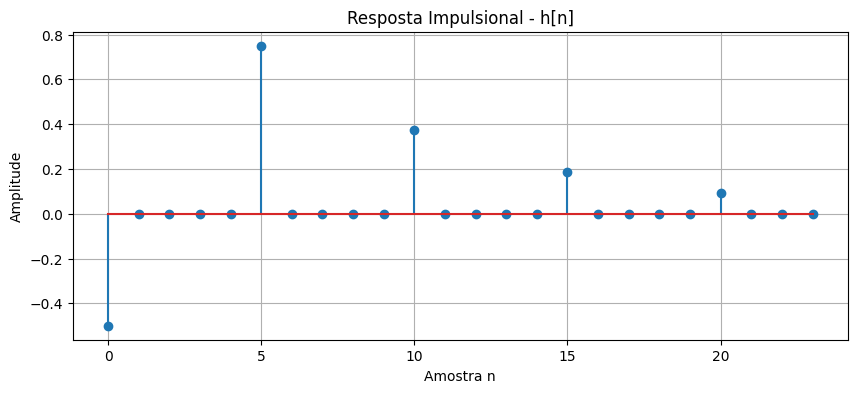

In [ ]:
N = 24
pulse = np.zeros(N)                                         
pulse[0] = 1.0                                              # Criação do Impulso de Dirac

h = ss.lfilter(bk_AP, ak_AP, pulse)                         # Resposta Impulsional

plt.figure(figsize=(10,4))                                  # Gráfico
plt.stem(h)
plt.title('Resposta Impulsional - h[n]')
plt.xlabel('Amostra n')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()

fs = 44100                                                  # Frequência de Amostragem

h_norm = h / np.max(np.abs(h)) * 0.9                        # Normalização do sinal
audio_int16 = np.int16(h_norm * 32767)                      # Codificação em 16 bits
wav.write('TP1_bii.wav', fs, audio_int16)                   # Criação do ficheiro wave

In [6]:
Audio(h_norm, rate=fs)                                      # Escuta do resultado final

iii) Aplique este filtro a sinais de teste (que considere adequados) e sinais audio para testar a sua funcionalidade.